Análise de Componentes Principais PCA

Criar uma proposta de ranking dos atletas com base nas features principais. Supondo que todas as observações fossem independentes.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv('/home/sol/Documentos/datasets/decathlon.csv', index_col=0)

In [6]:
df.head(30)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
Athlets,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar


In [13]:
# Análise da matriz de correlação dos dados das colunas
corr = df.iloc[:,0:10].corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746,-0.060546
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743,0.037540
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890,0.258175
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001,0.247448
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000,-0.180393
1500m,-0.060546,-0.033686,0.115803,-0.044903,0.408106,0.037540,0.258175,0.247448,-0.180393,1.000000


<AxesSubplot:>

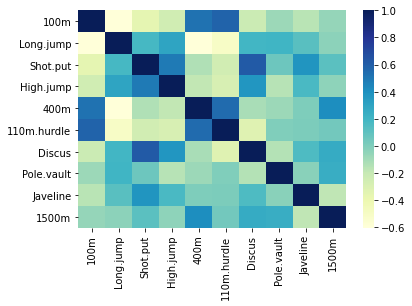

In [14]:
# Mapa de calor das correlações
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns, cmap='YlGnBu')

In [15]:
#Análise dos componentes principais
#Decomposição da matriz de variâncias e covariâncias em componentes principais
x = np.matrix(df.iloc[:,0:10])
s = np.cov(np.transpose(x))

In [18]:
# Variâncias da diagonal
np.diagonal(s)

array([6.91810976e-02, 1.00110000e-01, 6.79681220e-01, 7.91219512e-03,
       1.33044878e+00, 2.22584878e-01, 1.14098352e+01, 7.72839024e-02,
       2.32981930e+01, 1.36264701e+02])

In [19]:
# redução da dimensão em componentes principais
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [21]:
pca.fit(x)

PCA(n_components=5)

In [22]:
#coeficientes das 5 componentes principais
pca.components_

array([[-1.28080400e-03, -9.50593693e-04,  8.04474909e-03,
        -3.21942507e-04,  3.95670085e-02,  1.26099822e-03,
         7.79032346e-02,  5.70956842e-03, -8.59485398e-02,
         9.92409609e-01],
       [-1.11646237e-02,  9.65383661e-03,  8.56736836e-02,
         4.28001111e-03,  9.81124318e-03, -4.91153939e-03,
         2.67357273e-01, -1.11678946e-03,  9.57662014e-01,
         6.08751215e-02],
       [-1.48341603e-02,  1.96257900e-02,  1.21896071e-01,
         9.68654184e-03, -1.14483542e-01, -5.76395412e-02,
         9.41998077e-01, -1.93568661e-02, -2.67514654e-01,
        -9.33506332e-02],
       [ 1.57263136e-01, -1.97238816e-01, -9.13739470e-02,
        -1.02036490e-02,  9.16045359e-01,  2.49443693e-01,
         1.30305561e-01, -7.97485166e-02, -2.94579578e-02,
        -4.84092062e-02],
       [ 6.12517505e-02,  4.05555591e-02, -9.75919577e-01,
        -4.23482522e-02, -1.20290521e-01, -8.86567955e-03,
         1.25863548e-01, -8.42722662e-02,  5.32410155e-02,
         8.

Cinco foi escolhido como um número arbitrário. É necessário descobrir quantos componentes representam 90% da variabilidade dos dados

In [23]:
#Quantos componentes explicam 90%?
pca.explained_variance_ratio_

array([0.7965959 , 0.13552956, 0.057598  , 0.00660179, 0.00205503])

In [24]:
#Arredondando os valores temos:
np.round(pca.explained_variance_ratio_,2)

array([0.8 , 0.14, 0.06, 0.01, 0.  ])

In [25]:
#Fazendo a soma cumulativa temos que com duas variáveis é possivel explicar 94% dos dados
pca.explained_variance_ratio_.cumsum()

array([0.7965959 , 0.93212546, 0.98972346, 0.99632525, 0.99838027])

In [26]:
#Refazer a análise com duas componentes principais
pca = PCA(n_components=2)
pca.fit(x)
pca.components_

array([[-1.28080400e-03, -9.50593693e-04,  8.04474909e-03,
        -3.21942507e-04,  3.95670085e-02,  1.26099822e-03,
         7.79032346e-02,  5.70956842e-03, -8.59485398e-02,
         9.92409609e-01],
       [-1.11646237e-02,  9.65383661e-03,  8.56736836e-02,
         4.28001111e-03,  9.81124318e-03, -4.91153939e-03,
         2.67357273e-01, -1.11678946e-03,  9.57662014e-01,
         6.08751215e-02]])

In [27]:
#Obter os scores das componentes principais aplicados ao conjunto de dados
PCA1 = pca.transform(x)[:,0]
PCA2 = pca.transform(x)[:,1]

In [28]:
#adicionar as novas colunas de scores ao df
df['PCA1'] = PCA1
df['PCA2'] = PCA2

In [29]:
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,12.126899,5.319245
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,22.634006,4.818603
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,22.016009,-5.126563
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,0.389697,3.376956
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,-2.856746,5.324504


In [31]:
#Ordenar os atletas segundo a primeira componente principal
df.sort_values(by = 'PCA1', ascending=False)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.70,53.05,317.00,26,7573,OlympicG,38.339641,-2.223945
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar,22.634006,4.818603
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar,22.016009,-5.126563
Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.40,58.62,296.12,28,7404,OlympicG,17.421325,2.549930
BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,13,7313,Decastar,12.648385,-3.822986
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar,12.126899,5.319245
Terek,10.92,6.94,15.15,1.94,49.56,15.12,45.62,5.30,50.62,290.36,21,7893,OlympicG,12.018749,-6.283038
Turi,11.08,6.91,13.62,2.03,51.67,14.26,39.83,4.80,59.34,290.01,23,7708,OlympicG,10.537908,0.391183
Pogorelov,10.95,7.31,15.10,2.06,50.79,14.21,44.60,5.00,53.45,287.63,11,8084,OlympicG,9.031751,-3.995408
